In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import contextily as ctx

from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

In [2]:
df = pd.read_csv('202401-citibike-tripdata/202401-citibike-tripdata_1.csv')
df

/var/folders/1c/th5l16yj5bz3l9k2c0k2_k1w0000gn/T/ipykernel_17380/3500118955.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('202401-citibike-tripdata/202401-citibike-tripdata_1.csv')


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,58F2CA262B50E256,classic_bike,2024-01-25 20:39:09,2024-01-25 20:44:07,Broadway & E 14 St,5905.12,Ave A & E 11 St,5703.13,40.734546,-73.990741,40.728547,-73.981759,member
1,AA7AB6D6E9F8D21B,classic_bike,2024-01-15 18:44:36,2024-01-15 19:19:46,E 16 St & Irving Pl,5938.11,Clermont Ave & Park Ave,4692.01,40.735367,-73.987974,40.695734,-73.971297,member
2,1830A6C4BA1E1A9D,classic_bike,2024-01-03 19:27:58,2024-01-03 19:58:42,E 16 St & Irving Pl,5938.11,Clermont Ave & Park Ave,4692.01,40.735367,-73.987974,40.695734,-73.971297,member
3,3995B084A51A1038,classic_bike,2024-01-22 18:29:46,2024-01-22 18:59:57,E 16 St & Irving Pl,5938.11,Clermont Ave & Park Ave,4692.01,40.735367,-73.987974,40.695734,-73.971297,member
4,23EE6A8979C333B1,classic_bike,2024-01-27 09:55:39,2024-01-27 10:00:48,E 16 St & Irving Pl,5938.11,E 14 St & 1 Ave,5779.10,40.735367,-73.987974,40.731393,-73.982867,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,45C82F379A612E74,electric_bike,2024-01-27 15:09:20,2024-01-27 15:21:53,St Marks Pl & 2 Ave,5669.1,E 48 St & 3 Ave,6541.03,40.728338,-73.987466,40.754601,-73.971879,member
999996,FCFDAF965C8A978D,electric_bike,2024-01-20 10:10:05,2024-01-20 10:22:06,Willoughby St & Ashland Pl,4587.02,Market St & Henry St,5270.09,40.691802,-73.978676,40.713107,-73.994464,member
999997,258A221C9F7515A8,electric_bike,2024-01-15 18:18:11,2024-01-15 18:21:00,1 Ave & E 39 St,6303.01,E 39 St & Lexington Ave,6389.09,40.747177,-73.971244,40.749499,-73.977292,member
999998,CB21C758F9E6E33E,electric_bike,2024-01-03 13:40:07,2024-01-03 13:45:06,W Broadway & Watts St,5569.07,Lafayette St & E 8 St,5788.13,40.722985,-74.002846,40.730207,-73.991026,member


In [3]:
df['date_full'] = pd.to_datetime(df['started_at'])
df['date'] = df['date_full'].dt.date
df['hour'] = df['date_full'].dt.hour
df['day_of_week'] = df['date_full'].dt.day_name()

# Daytime usage is higher than nighttime usage, especially during the peak traffic times for commuting to and from work.

<Axes: xlabel='hour'>

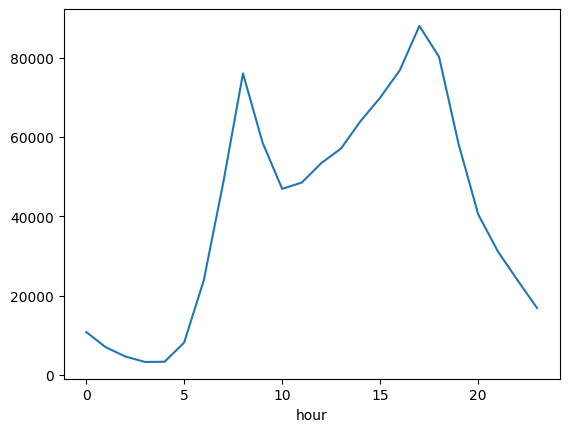

In [4]:
df['hour'].value_counts().sort_index().plot()

# Wednesday appears to be the most popular day.

<Axes: xlabel='day_of_week'>

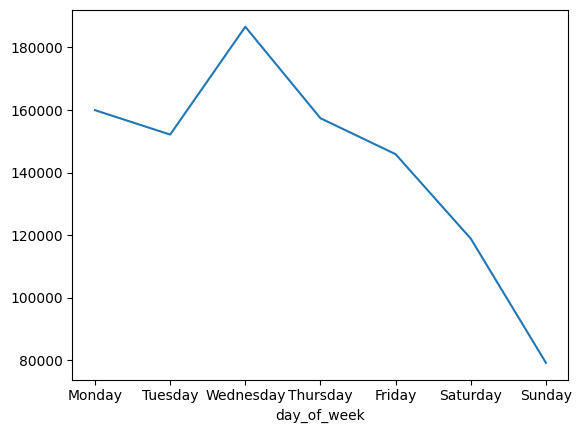

In [5]:
df['day_of_week'].value_counts().loc[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']].plot()

In [6]:
df_day = df[df['started_at'].str.contains('2024-01-25')]
df_day

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date_full,date,hour,day_of_week
0,58F2CA262B50E256,classic_bike,2024-01-25 20:39:09,2024-01-25 20:44:07,Broadway & E 14 St,5905.12,Ave A & E 11 St,5703.13,40.734546,-73.990741,40.728547,-73.981759,member,2024-01-25 20:39:09,2024-01-25,20,Thursday
98,A7589950BED01A3A,classic_bike,2024-01-25 19:20:48,2024-01-25 19:26:03,Vesey Pl & River Terrace,5297.02,Watts St & Greenwich St,5578.02,40.715338,-74.016584,40.724055,-74.009660,member,2024-01-25 19:20:48,2024-01-25,19,Thursday
125,967952B656D7ED4B,electric_bike,2024-01-25 19:55:10,2024-01-25 20:00:53,Allen St & Stanton St,5484.09,Ave A & E 11 St,5703.13,40.721940,-73.989202,40.728547,-73.981759,member,2024-01-25 19:55:10,2024-01-25,19,Thursday
144,DE7F27420814B6A6,electric_bike,2024-01-25 12:20:04,2024-01-25 12:26:18,Woodhaven Blvd & Hoffman Dr,5845.02,St James Ave & 51 Ave,6014.01,40.733043,-73.870978,40.738130,-73.881040,member,2024-01-25 12:20:04,2024-01-25,12,Thursday
157,5B6BB43881CF298B,classic_bike,2024-01-25 18:11:52,2024-01-25 18:19:28,Driggs Ave & N 9 St,5411.08,Stagg St & Union Ave,5117.05,40.718170,-73.955201,40.708771,-73.950953,member,2024-01-25 18:11:52,2024-01-25,18,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999909,33EBCDA6C8C03FF9,electric_bike,2024-01-25 09:41:42,2024-01-25 09:49:11,W 37 St & 10 Ave,6611.02,6 Ave & W 45 St,6593.15,40.756528,-73.998360,40.756951,-73.982631,member,2024-01-25 09:41:42,2024-01-25,9,Thursday
999910,2FDEA8FD6DED40D5,electric_bike,2024-01-25 16:42:03,2024-01-25 16:52:09,E 68 St & 3 Ave,6896.16,E 39 St & Lexington Ave,6389.09,40.766920,-73.962123,40.749499,-73.977292,member,2024-01-25 16:42:03,2024-01-25,16,Thursday
999932,ACD17B387B335B70,electric_bike,2024-01-25 16:54:57,2024-01-25 17:04:12,Sullivan St & Washington Sq,5721.01,Market St & Henry St,5270.09,40.730199,-73.998664,40.713107,-73.994464,member,2024-01-25 16:54:57,2024-01-25,16,Thursday
999983,C3DB1122CFF4A3AB,classic_bike,2024-01-25 17:33:55,2024-01-25 17:45:03,1 Ave & E 39 St,6303.01,6 Ave & W 45 St,6593.15,40.747140,-73.971130,40.756951,-73.982631,member,2024-01-25 17:33:55,2024-01-25,17,Thursday


In [7]:
df_day_unique_station = df_day.groupby('start_station_name').agg({'ride_id': 'count', 'start_lat': 'first', 'start_lng': 'first'}).reset_index()
df_day_unique_station.columns = ['start_station_name', 'ride_count', 'start_lat', 'start_lng']
df_day_unique_station

,start_station_name,ride_count,start_lat,start_lng
0,1 Ave & E 110 St,21,40.792554,-73.938176
1,1 Ave & E 16 St,70,40.732219,-73.981656
2,1 Ave & E 18 St,109,40.733812,-73.980544
3,1 Ave & E 30 St,51,40.741444,-73.975361
4,1 Ave & E 39 St,127,40.747249,-73.971160
...,...,...,...,...
1847,Wyckoff Ave & Jefferson St,12,40.707213,-73.923762
1848,Wyckoff Ave & Stanhope St,21,40.703545,-73.917775
1849,Wyckoff St & 3 Ave,17,40.682792,-73.982597
1850,Wythe Ave & Metropolitan Ave,64,40.717090,-73.963172


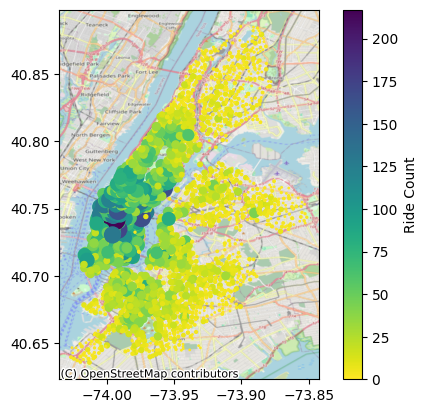

In [8]:
cmap = plt.get_cmap('viridis_r')
norm = Normalize(vmin=0, vmax=df_day_unique_station['ride_count'].max())

fig, ax = plt.subplots()
ax.scatter(df_day_unique_station['start_lng'], df_day_unique_station['start_lat'],
            s=df_day_unique_station['ride_count'], 
            color=cmap(norm(df_day_unique_station['ride_count'])))

sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Ride Count')

ctx.add_basemap(ax, crs="EPSG:4236" ,source=ctx.providers.OpenStreetMap.Mapnik)
plt.show()